In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [71]:
bases = pd.read_csv('clean_baseball_data1.csv')
bases.head()

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,0,597,FC,2017-10-01,91.9,-1.1948,5.9921,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN
1,1,605,FC,2017-10-01,91.8,-1.0777,6.1772,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic
2,2,630,FF,2017-10-01,94.7,-0.6208,6.3387,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic
3,3,644,CH,2017-10-01,82.8,-0.9901,6.0626,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic
4,4,652,FT,2017-10-01,95.9,-0.8903,6.1341,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic


In [72]:
bases.description.value_counts()

ball                       244088
foul                       125932
called_strike              120919
hit_into_play               81916
swinging_strike             69825
hit_into_play_no_out        29075
blocked_ball                16987
hit_into_play_score         16573
foul_tip                     6017
swinging_strike_blocked      5705
foul_bunt                    1891
hit_by_pitch                 1763
missed_bunt                   435
pitchout                      117
Name: description, dtype: int64

I want to use Logistic Regression to predict the description column, so I must first convert the categories into numbers, as well as the pitch name into numbers as I may want to use this as an X variable

In [73]:
bases['description_nums'] = bases.description.map({'ball':3, 
                                                   'foul':4, 
                                                   'called_strike':5,
                                                   'hit_into_play':6,
                                                  'swinging_strike':1,
                                                  'hit_into_play_no_out':7,
                                                  'blocked_ball':8,
                                                  'hit_into_play_score':9,
                                                  'foul_tip':10,
                                                  'swinging_strike_blocked':2,
                                                  'foul_bunt':11,
                                                  'hit_by_pitch':12,
                                                  'missed_bunt':13,
                                                  'pitchout':14})
bases.head()

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,...,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,description_nums
0,0,597,FC,2017-10-01,91.9,-1.1948,5.9921,Roberto Osuna,595885.0,532077.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,6
1,1,605,FC,2017-10-01,91.8,-1.0777,6.1772,Roberto Osuna,595885.0,532077.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,4
2,2,630,FF,2017-10-01,94.7,-0.6208,6.3387,Roberto Osuna,595885.0,532077.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,3
3,3,644,CH,2017-10-01,82.8,-0.9901,6.0626,Roberto Osuna,595885.0,532077.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,3
4,4,652,FT,2017-10-01,95.9,-0.8903,6.1341,Roberto Osuna,595885.0,532077.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,3


In [74]:
bases['pitch_name'].value_counts()

4-Seam Fastball    255084
Slider             117868
2-Seam Fastball     95394
Changeup            71788
Curveball           59233
Sinker              49538
Cutter              36737
Knuckle Curve       18791
Split Finger        11346
Knuckle Ball         2652
Forkball              247
Eephus                187
Pitch Out             116
Screwball              39
Unknown                13
Name: pitch_name, dtype: int64

In [75]:
bases['pitch_nums'] = bases['pitch_name'].map({'4-Seam Fastball':1, 
                                                   'Slider':2, 
                                                   '2-Seam Fastball':3,
                                                   'Changeup':4,
                                                  'Curveball':5,
                                                  'Sinker':6,
                                                  'Cutter':7,
                                                  'Knuckle Curve':8,
                                                  'Split Finger':9,
                                                  'Knuckle Ball':10,
                                                  'Forkball':11,
                                                  'Eephus':12,
                                                  'Pitch Out':13,
                                                  'Screwball':14,
                                              'Unknown':15})
bases.head()

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,description_nums,pitch_nums
0,0,597,FC,2017-10-01,91.9,-1.1948,5.9921,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,6,7.0
1,1,605,FC,2017-10-01,91.8,-1.0777,6.1772,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,4,7.0
2,2,630,FF,2017-10-01,94.7,-0.6208,6.3387,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,3,1.0
3,3,644,CH,2017-10-01,82.8,-0.9901,6.0626,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,3,4.0
4,4,652,FT,2017-10-01,95.9,-0.8903,6.1341,Roberto Osuna,595885.0,532077.0,...,1.0,2.0,2.0,1.0,1.0,2.0,Infield shift,Strategic,3,3.0


I am now going to use these new columns to create some visualizations previously not available to me when these columns were strings

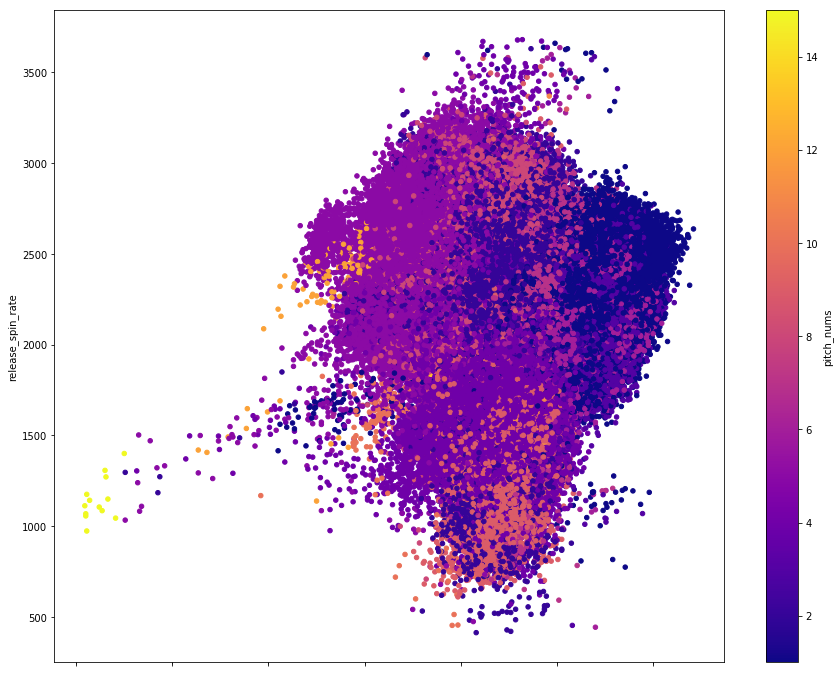

In [76]:
bases.plot(kind='scatter', x='release_speed', y='release_spin_rate', c='pitch_nums', cmap='plasma', figsize=(15,12));

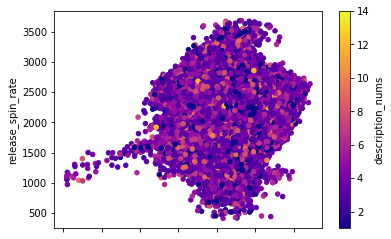

In [77]:
bases.plot(kind='scatter', x='release_speed', y='release_spin_rate', c='description_nums', cmap='plasma');

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
print(bases.columns)
print(bases.dtypes)

Index(['Unnamed: 0', 'index', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'zone', 'des', 'game_type', 'stand',
       'p_throws', 'home_team', 'away_team', 'type', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'pos2_person_id', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pos1_person_id', 'pos2_person_id.1', 'pos3_person_id',
       'pos4_person_id', 'pos5_person_id', 'pos6_person_id', 'pos7_person_id',
       'pos8_person_id', 'pos9_person_id', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',


In [80]:
bases2 = bases[['pitch_nums', 'release_speed', 'release_pos_x', 'release_pos_y', 
                'release_pos_z', 'pfx_x', 'pfx_z', 'release_spin_rate', 'description_nums']]
bases2.dropna(inplace=True)

C:\Users\593011\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In order to run my model, I made a new DataFrame with the Xs and Y variables I wanted, and then dropped the nulls from there so as to not lose any information I wanted. Still >500k rows!

In [97]:
logreg = LogisticRegression(C=1e9, solver='saga', multi_class='multinomial')

feature_cols = ['pitch_nums', 'release_speed', 'release_pos_x', 'release_pos_y', 
                'release_pos_z', 'pfx_x', 'pfx_z', 'release_spin_rate']
X = bases2[feature_cols]
y = bases2['description_nums']

logreg.fit(X,y)
y_pred = logreg.predict(X)

C:\Users\593011\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [98]:
print(logreg.score(X, y))

0.33874775522951667


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

print(logreg.score(X_test, y_test))

0.33722686594285195


C:\Users\593011\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [92]:
list(zip(feature_cols, logreg.coef_[0])) #model coefficients

[('pitch_nums', -0.01091052707749363),
 ('release_speed', -0.0008600144974916861),
 ('release_pos_x', -0.011048858373109458),
 ('release_pos_y', 0.027928838655422186),
 ('release_pos_z', -0.012285184314353869),
 ('pfx_x', 0.024847415366408967),
 ('pfx_z', -0.010711321220725352),
 ('release_spin_rate', 0.00021067221235945754)]

In [96]:
y_test.value_counts() / len(y_test)   #baseline = 33.7%

3     0.337255
4     0.175589
5     0.168230
6     0.113598
1     0.097312
7     0.040629
8     0.023060
9     0.022629
10    0.008200
2     0.007683
11    0.002584
12    0.002464
13    0.000608
14    0.000159
Name: description_nums, dtype: float64

This model was improved from the baseline drastically, but it may still not be useful for its purpose. I will also be submitting models for individual pitches as it will produce stronger results.